# Parseado

In [2]:
def parse_tsp_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()
    
    metadata = {}
    nodes = []
    is_node_section = False
    
    for line in lines:
        line = line.strip()
        
        if not line or line.startswith("COMMENT"):
            continue
        
        if line == "NODE_COORD_SECTION":
            is_node_section = True
            continue
        
        if is_node_section:
            parts = line.split()
            if len(parts) == 3:
                node_id, x, y = map(float, parts)
                nodes.append((int(node_id), x, y))
        else:
            key_value = line.split(" : ")
            if len(key_value) == 2:
                key, value = key_value
                metadata[key.strip()] = value.strip()
    
    return metadata, nodes

puntos_path = "data/xqf131.tsp"
argentina = "data/ar9152.tsp"

metadata, nodes = parse_tsp_file(puntos_path)

# Mostrar resultados
import pprint
pprint.pprint(metadata)
pprint.pprint(nodes[:8])  # Mostrar solo los primeros 8 nodos


print(nodes[1][1])


{'DIMENSION': '131',
 'EDGE_WEIGHT_TYPE': 'EUC_2D',
 'NAME': 'xqf131',
 'TYPE': 'TSP'}
[(1, 0.0, 13.0),
 (2, 0.0, 26.0),
 (3, 0.0, 27.0),
 (4, 0.0, 39.0),
 (5, 2.0, 0.0),
 (6, 5.0, 13.0),
 (7, 5.0, 19.0),
 (8, 5.0, 25.0)]
0.0


# Simulated annealing

In [ ]:
import random
import numpy as np


def vecindario_aleatorio():
    ciudades = list(range(int(metadata['DIMENSION'])))
    random.shuffle(ciudades)
    return [ciudades]


def distancia(a,b):
    return ((nodes[a-1][1]-nodes[b-1][1])**2+(nodes[a-1][2]-nodes[b-1][2])**2)**(1/2)

def funcion_objetivo(solucion):
    # suma = 0
    # for i in range(len(solucion)-1):
    #     suma += 
    # suma += distancia(solucion[-1],solucion[0])
    suma = sum([distancia(solucion[i],solucion[i+1]) for i in range(len(solucion)-1)])
    return suma

def vecindario_2opt(estado):
    vecindario = []
    for i in range(len(estado)):
        for j in range(i+3,len(estado)):
            parte_1 = estado[:i+1]
            parte_2 = estado[i+1:j]
            parte_3 = estado[j:]
            parte_2.reverse()
            vecino = parte_1 + parte_2 + parte_3
            vecindario.append(vecino)
    return vecindario


def vecindario_swap(estado):
    vecindario = []
    for i in range(len(estado)):    
        for j in range(i+1,len(estado)):
            vecino = estado[:]
            vecino[i], vecino[j] = vecino[j], vecino[i]
            vecindario.append(vecino)
    return vecindario


    

In [50]:
a= list(range(10))

vecinos=vecindario_swap(a)
print(a)
for i in vecinos:
    print(i)
    print(funcion_objetivo(i))
    print("")

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 1, 0, 3, 4, 5, 6, 7, 8, 9]
[3, 1, 2, 0, 4, 5, 6, 7, 8, 9]
[4, 1, 2, 3, 0, 5, 6, 7, 8, 9]
[5, 1, 2, 3, 4, 0, 6, 7, 8, 9]
[6, 1, 2, 3, 4, 5, 0, 7, 8, 9]
[7, 1, 2, 3, 4, 5, 6, 0, 8, 9]
[8, 1, 2, 3, 4, 5, 6, 7, 0, 9]
[9, 1, 2, 3, 4, 5, 6, 7, 8, 0]
[0, 2, 1, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 2, 1, 4, 5, 6, 7, 8, 9]
[0, 4, 2, 3, 1, 5, 6, 7, 8, 9]
[0, 5, 2, 3, 4, 1, 6, 7, 8, 9]
[0, 6, 2, 3, 4, 5, 1, 7, 8, 9]
[0, 7, 2, 3, 4, 5, 6, 1, 8, 9]
[0, 8, 2, 3, 4, 5, 6, 7, 1, 9]
[0, 9, 2, 3, 4, 5, 6, 7, 8, 1]
[0, 1, 3, 2, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 3, 2, 5, 6, 7, 8, 9]
[0, 1, 5, 3, 4, 2, 6, 7, 8, 9]
[0, 1, 6, 3, 4, 5, 2, 7, 8, 9]
[0, 1, 7, 3, 4, 5, 6, 2, 8, 9]
[0, 1, 8, 3, 4, 5, 6, 7, 2, 9]
[0, 1, 9, 3, 4, 5, 6, 7, 8, 2]
[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 5, 4, 3, 6, 7, 8, 9]
[0, 1, 2, 6, 4, 5, 3, 7, 8, 9]
[0, 1, 2, 7, 4, 5, 6, 3, 8, 9]
[0, 1, 2, 8, 4, 5, 6, 7, 3, 9]
[0, 1, 2, 9, 4, 5, 6, 7, 8, 3]
[0, 1, 2, 3, 5, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 6, 5, 4, 7, 8, 9]
[0, 1, 2

TypeError: 'NoneType' object is not iterable

entrada: Problema p y estrategia de enfriamiento es
salida: Una solución
actual=p.ESTADO-INICIAL()
T = es.Tmax //Temperatura inicial
mientras T > es.Tmin hacer
    para un numero de iteraciones es.MaxIter hacer
        vecino = SUCESOR-ALEATORIO(actual)
        ∆E = f(vecino) - f(actual)
        si ∆E ≤ 0 entonces //el vecino es mejor
            actual=vecino //aceptamos el vecino mejor
        si no
            con probabilidad es.prob(∆E, T), actual=vecino
    T = es.g(T)//Actualizamos la temperatura según la estrategia
devolver actual.ESTADO

In [42]:

import random

def do_simulated_annealing(selecion_ruta_inicial, t_max, t_min, max_iter, param_t = 0.9, vecindario = None, distribucion = None, verbose = False):
    actual = selecion_ruta_inicial()[0]
    T=t_max
    while T>t_min:
        for _ in range(max_iter):
            vecino = random.choice(vecindario(actual))
            delta = funcion_objetivo(vecino) - funcion_objetivo(actual)
            if delta < 0:
                actual = vecino
                break
            else:
                if random.random() < distribucion(delta, T):
                    actual = vecino
                    break
        T = param_t*T
        if verbose:
            print(f'Temp: {T:.5f} - {funcion_objetivo(actual)}')
    return actual





In [43]:


n=0


while True:

    solucion = do_simulated_annealing(selecion_ruta_inicial= vecindario_aleatorio, 
                        t_max=1000, 
                        t_min=0.001, 
                        max_iter=100, 
                        param_t = 0.99, 
                        vecindario = vecindario_2opt, 
                        distribucion = lambda delta, T: np.exp(-delta/T),
                        verbose=True)
    
    f_solucion = funcion_objetivo(solucion)
    
    if funcion_objetivo(solucion) < 3000:
        n+=1
        print(n)
        print(solucion)
        print(f_solucion)
        if n>1:
            break


Temp: 990.00000 - 4326.133074827263
Temp: 980.10000 - 4345.550882350625
Temp: 970.29900 - 4251.06225982426
Temp: 960.59601 - 4262.004581015012
Temp: 950.99005 - 4289.2471332982295
Temp: 941.48015 - 4265.942576095319
Temp: 932.06535 - 4291.515639516889
Temp: 922.74469 - 4372.621579880683
Temp: 913.51725 - 4372.146830488529
Temp: 904.38208 - 4369.298155238933
Temp: 895.33825 - 4405.082372811208
Temp: 886.38487 - 4470.686953508199
Temp: 877.52102 - 4449.684981003438
Temp: 868.74581 - 4449.805538782994
Temp: 860.05835 - 4517.409221681558
Temp: 851.45777 - 4521.734051169834
Temp: 842.94319 - 4530.4817101534045
Temp: 834.51376 - 4531.693766007177
Temp: 826.16862 - 4498.069932727704
Temp: 817.90694 - 4498.447916971264
Temp: 809.72787 - 4498.802018965967
Temp: 801.63059 - 4532.745104415198
Temp: 793.61428 - 4569.187903402991
Temp: 785.67814 - 4556.353823860006
Temp: 777.82136 - 4532.1146283465
Temp: 770.04315 - 4552.325325044736
Temp: 762.34271 - 4551.656021019571
Temp: 754.71929 - 4528.859862

KeyboardInterrupt: 

# Analisis

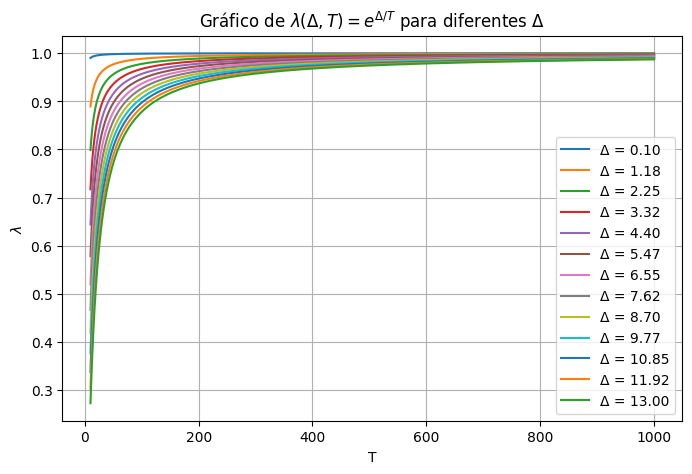

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función lambda
def lambda_func(delta, T):
    return np.exp(-delta / T)

# Definir los valores de delta
delta_values = np.linspace(0.1, 13, 13)  # Tomamos 4 valores equiespaciados entre 2 y 5

t_max = 1000  # Valor máximo de T
t_min = 10    # Valor mínimo de T
num_puntos = 10000

# Rango de valores para T (invertido)
T_values = np.linspace(t_max, t_min, num_puntos)

# Graficar para diferentes valores de delta
plt.figure(figsize=(8, 5))

for delta in delta_values:
    lambda_values = lambda_func(delta, T_values)
    plt.plot(T_values, lambda_values, label=f'Δ = {delta:.2f}')

# Configuración del gráfico
plt.xlabel('T')
plt.ylabel(r'$\lambda$')
plt.title(r'Gráfico de $\lambda(\Delta, T) = e^{\Delta / T}$ para diferentes $\Delta$')
plt.legend()
plt.grid()
plt.show()


# OPTIMIZACIÓN


In [50]:
import random
import numpy as np
import math

def parse_tsp_file(file_path):
    metadata = {}
    nodes = []
    is_node_section = False
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith("COMMENT"):
                continue

            if line == "NODE_COORD_SECTION":
                is_node_section = True
                continue
            
            if is_node_section:
                parts = line.split()
                if len(parts) == 3:
                    node_id, x, y = map(float, parts)
                    nodes.append((int(node_id), x, y))
            else:
                key_value = line.split(":")
                if len(key_value) == 2:
                    key_aux, value_aux = key_value
                    key, value = key_aux.strip(), value_aux.strip()
                    metadata[key.strip()] = value.strip()
    
    return metadata, nodes

def precompute_distance_matrix(nodes):
    n = len(nodes)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = math.hypot(nodes[i][1] - nodes[j][1], nodes[i][2] - nodes[j][2])
            matrix[i][j] = d
            matrix[j][i] = d
    return matrix

def funcion_objetivo(solucion, dist_matrix):
    # Se asume ciclo completo (vuelta al inicio)
    return sum(dist_matrix[solucion[i]][solucion[i+1]] for i in range(len(solucion)-1)) + dist_matrix[solucion[-1]][solucion[0]]

def delta_2opt(solucion, i, j, dist_matrix):
    # Realiza el cálculo incremental del 2-opt.
    # Los índices son tales que se invertirá el segmento de (i+1) a j.
    a = solucion[i]
    b = solucion[i+1]
    c = solucion[j]
    d = solucion[(j+1) % len(solucion)]
    return - dist_matrix[a][b] - dist_matrix[c][d] + dist_matrix[a][c] + dist_matrix[b][d]

def vecindario_2opt(solucion):
    n = len(solucion)
    # Evita cambios triviales
    for i in range(n - 2):
        for j in range(i + 1, n - 1):
            # Genera el vecino aplicando 2-opt
            nuevo = solucion[:i+1] + solucion[i+1:j][::-1] + solucion[j:]
            yield nuevo, i, j

def simulated_annealing(solucion_inicial, dist_matrix, t_max, t_min, max_iter, deca, verbose=False):
    current = solucion_inicial
    current_cost = funcion_objetivo(current, dist_matrix)
    T = t_max
    for _ in range(max_iter):
        # Itera sobre el vecindario 2-opt
        for vecino, i, j in vecindario_2opt(current):
            delta = delta_2opt(current, i, j, dist_matrix)
            # Acepta el movimiento si mejora o probabilísticamente
            if delta < 0 or random.random() < math.exp(-delta / T):
                current = vecino
                current_cost += delta
                break
        T *= deca
        if verbose:
            print(f'Temp: {T:.5f} - Costo: {current_cost:.2f}')
        if T < t_min:
            break
    return current, current_cost

if __name__ == "__main__":
    puntos_path = "data/dj38.tsp"
    metadata, nodes = parse_tsp_file(puntos_path)
    
    n = int(metadata['DIMENSION'])
    # Solución inicial aleatoria (0-indexada)
    solucion_inicial = list(range(n))
    random.shuffle(solucion_inicial)
    
    dist_matrix = precompute_distance_matrix(nodes)
    
    best_sol, best_cost = simulated_annealing(solucion_inicial, dist_matrix, 
                                              t_max=10000, t_min=0.001, max_iter=10000, deca=0.95, verbose=True)
    
    print("Costo de la solución:", best_cost)


Temp: 9500.00000 - Costo: 28037.79
Temp: 9025.00000 - Costo: 28037.79
Temp: 8573.75000 - Costo: 28037.79
Temp: 8145.06250 - Costo: 28037.79
Temp: 7737.80937 - Costo: 28037.79
Temp: 7350.91891 - Costo: 28037.79
Temp: 6983.37296 - Costo: 28037.79
Temp: 6634.20431 - Costo: 28037.79
Temp: 6302.49410 - Costo: 28037.79
Temp: 5987.36939 - Costo: 28037.79
Temp: 5688.00092 - Costo: 28037.79
Temp: 5403.60088 - Costo: 28037.79
Temp: 5133.42083 - Costo: 28037.79
Temp: 4876.74979 - Costo: 28037.79
Temp: 4632.91230 - Costo: 28037.79
Temp: 4401.26669 - Costo: 28037.79
Temp: 4181.20335 - Costo: 28037.79
Temp: 3972.14318 - Costo: 28037.79
Temp: 3773.53603 - Costo: 28037.79
Temp: 3584.85922 - Costo: 28037.79
Temp: 3405.61626 - Costo: 28037.79
Temp: 3235.33545 - Costo: 28037.79
Temp: 3073.56868 - Costo: 28037.79
Temp: 2919.89024 - Costo: 28037.79
Temp: 2773.89573 - Costo: 28037.79
Temp: 2635.20094 - Costo: 28037.79
Temp: 2503.44090 - Costo: 28037.79
Temp: 2378.26885 - Costo: 28037.79
Temp: 2259.35541 - C

In [51]:
sol = [(1, 11003.611100, 42102.500000),
(38, 12645.000000, 42973.333300)]

dist = sum([math.sqrt((sol[i][1] - sol[i+1][1])**2 + (sol[i][2] - sol[i+1][2])**2) for i in [0]])

print(dist)


sol = list(range(1,38))
print(funcion_objetivo(sol))

1858.0926127166258


TypeError: funcion_objetivo() missing 1 required positional argument: 'dist_matrix'